# MoviesOnStreamingPlatforms_updated.csv

## 멀티캠퍼스 지능형 서비스 개발 과정 semi-project
- B반 2조 DATAO팀
- 팀원 : 류청하 송재현 조운기 최현수
- DATAO 서비스를 위한 데이터를 탐색합니다.

- 데이터 수집 출처 : 각 OTT 플랫폼이 Kaggle에 제공한 영화 특성 데이터<br>
https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# # 시각화 호출
import matplotlib.pyplot as plt
# %matplotlib inline
# import matplotlib.image as mpimg
# import plotly.express as px
# import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./MoviesOnStreamingPlatforms_updated.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.shape
# 16744개의 데이터와 17개의 columns

(16744, 17)

In [11]:
# 행 번호와 중복되는 컬럼값 제거
df.drop(['Unnamed: 0', 'ID', 'Type'], axis=1, inplace=True)

KeyError: "['Unnamed: 0' 'ID'] not found in axis"

In [5]:
df.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
df.info()
# 수치형 변수 : Year, IMDb, Runtime
# 범주형 변수 : Title, Age, Rotten Tomatoes, Directors, Genres, Country, Language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


- 범주형 변수 중에서 Age, Rotten Tomatoes는 필요에 따라 데이터 전처리 후 진행 필요합니다.
- 범주형 변수 Directors, Genres, Country, Language는 텍스트 전처리가 필요합니다.

In [9]:
df.describe()
# 각 변수 전처리 전이므로, 기본 통계치 지수를 파악하기 어렵습니다.

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


## 결측치 파악

- Age와 Rotten Tomatoes : 시청연령제한, Rotten Tomatoes 평점
- Age는 영화 작품 자체의 연령제한이 없기 보다, 플랫폼에서 제공될 당시 결측이 생겼습니다.
- Rotten Tomatoes는 결측치가 많지만 중앙값으로 대체하면 영화 평가에 민감하게 반영될 수 있습니다. 평점 분포 분석에 활용이 어렵습니다.

<AxesSubplot:>

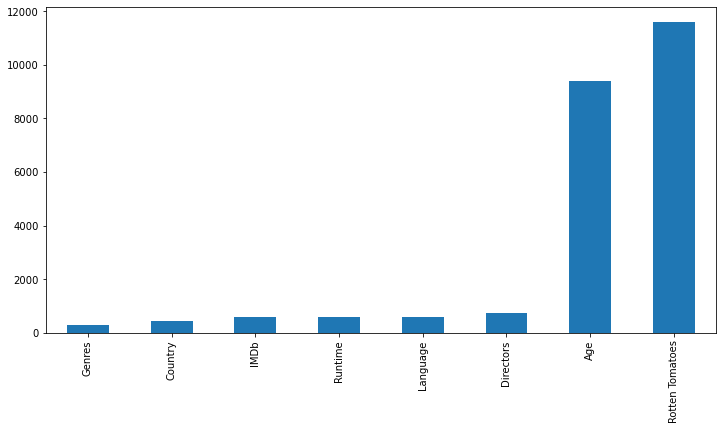

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0] 
missing.sort_values(inplace=True) 
missing.plot.bar(figsize = (12,6))

# 코드 단순화를 위해 missingno를 사용할 수 있습니다.
# !pip install missingno
# import missingno as msno
# msno.matrix(df, color = (0.1, 0.6, 0.8))

## column별 특성 파악

### 년도 분포 파악
1902년~2020년 영화 존재

In [18]:
year_range = list(df['Year'].unique())
year_range.sort()
year_range
# year_count = df['Year'].value_counts()
# year_count

[1902,
 1912,
 1913,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

### Age

In [19]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

### 플랫폼별 영화 개수

In [20]:
netflixdf = df[df['Netflix'] == 1] #3233개
primedf = df[df['Prime Video'] == 1] #11922개
huludf = df[df['Hulu'] == 1] #11922개
disneydf = df[df['Disney+'] == 1] #11922개
print("넷플릭스 영화 개수 : ", len(netflixdf))
print("프라임비디오 영화 개수 : ", len(primedf))
print("훌루 영화 개수 : ", len(huludf))
print("디즈니플러스 영화 개수 : ", len(disneydf))

넷플릭스 영화 개수 :  3560
프라임비디오 영화 개수 :  12354
훌루 영화 개수 :  903
디즈니플러스 영화 개수 :  564


### 영화 제작 국가

총 168개국의 영화가 존재

In [21]:
coun_d = df['Country'].str.get_dummies(',')
coun_d.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,United States,Uruguay,Vanuatu,Venezuela,Vietnam,West Germany,Yemen,Yugoslavia,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 영화 장르
총 27개의 장르가 존재

In [22]:
genres_d = df['Genres'].str.get_dummies(',')
genres_d.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 지원 언어
총 178개 언어 지원(영화별 지원 언어 상이)

In [23]:
lang_d = df['Language'].str.get_dummies(',')
lang_d.head()

,Ancient (to 1453),Aboriginal,Acholi,Afrikaans,Akan,Albanian,Algonquin,American Sign Language,Amharic,Apache languages,...,Uighur,Ukrainian,Urdu,Vietnamese,Welsh,Wolof,Xhosa,Yiddish,Yoruba,Zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 상영시간(분)

In [24]:
df['Runtime'].describe()

count    16152.000000
mean        93.413447
std         28.219222
min          1.000000
25%         82.000000
50%         92.000000
75%        104.000000
max       1256.000000
Name: Runtime, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


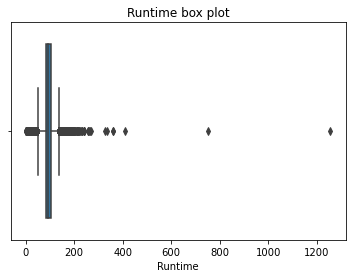

In [34]:
sns.boxplot(df['Runtime'])
plt.title("Runtime box plot")
plt.show()

이상치가 극명하게 드러나는 Runtime 데이터 파악

In [37]:
df[df['Runtime'] >= 400]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4405,Law of the Lawless,1964,NaN,6.1,NaN,0,1,1,0,0,NaN,"Action,Crime,Drama",Russia,Russian,750.0
13179,Colorado,1940,all,5.9,NaN,0,0,1,0,0,NaN,"Action,Adventure,Drama,Romance,Western",United States,English,1256.0
15295,The Vatican Museums,2007,NaN,5.0,NaN,0,0,1,0,0,Luca De Mata,NaN,Italy,English,410.0


15295행인 "The Vatican Museums"를 제외한 나머지 runtime이 400분 이상인 영화는 데이터 측정 오류가 존재합니다. Runtime을 분석에 활용할 시 400분 이상의 값은 제거한 후 사용하세요!

## 데이터 전처리용 코드

In [38]:
df2 = df.copy()

In [39]:
df2['Age'].replace('all', '0', inplace=True) 
df2['Age'] = df2['Age'].str.replace('+', '')
df2['Age'].unique()

<ipython-input-39-e31b7f3ca487>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Age'] = df2['Age'].str.replace('+', '')


array(['13', '18', '7', nan, '0', '16'], dtype=object)

In [40]:
df2['Rotten Tomatoes'] = df2['Rotten Tomatoes'].str.replace('%', '')
type(df2['Rotten Tomatoes'].dtype)

numpy.dtype[object_]

In [41]:
df2[['Age', 'Rotten Tomatoes']] = df2[['Age', 'Rotten Tomatoes']].apply(pd.to_numeric)
df2.dtypes

Title               object
Year                 int64
Age                float64
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [42]:
df2.head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,Spider-Man: Into the Spider-Verse,2018,7.0,8.4,97.0,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,The Pianist,2002,18.0,8.5,95.0,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,Django Unchained,2012,18.0,8.4,87.0,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,Raiders of the Lost Ark,1981,7.0,8.4,95.0,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,Inglourious Basterds,2009,18.0,8.3,89.0,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [43]:
df2.corr()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
Year,1.000000,0.185227,-0.021181,-0.057137,0.258533,0.098009,-0.253377,-0.046819,NaN,0.081984
Age,0.185227,1.000000,-0.162687,-0.060715,0.037434,0.019667,0.182907,-0.396139,NaN,0.040303
IMDb,-0.021181,-0.162687,1.000000,0.616320,0.135105,0.042191,-0.163447,0.075895,NaN,0.088987
Rotten Tomatoes,-0.057137,-0.060715,0.616320,1.000000,0.017842,0.020373,-0.049916,-0.011805,NaN,0.003791
Netflix,0.258533,0.037434,0.135105,0.017842,1.000000,-0.107911,-0.757215,-0.088927,NaN,0.099526
Hulu,0.098009,0.019667,0.042191,0.020373,-0.107911,1.000000,-0.255641,-0.034317,NaN,0.033985
Prime Video,-0.253377,0.182907,-0.163447,-0.049916,-0.757215,-0.255641,1.000000,-0.298900,NaN,-0.067378
Disney+,-0.046819,-0.396139,0.075895,-0.011805,-0.088927,-0.034317,-0.298900,1.000000,NaN,-0.019976
Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,0.081984,0.040303,0.088987,0.003791,0.099526,0.033985,-0.067378,-0.019976,NaN,1.000000
